# 1.1 数字图像基本概念

        人类约有75%的信息是通过视觉获取的，数字图像处理是用计算机处理所获取视觉信息的技术。

## 图像的颜色
* 色度学理论认为，任何颜色可由红、绿、蓝三种基本颜色混合得到。
* 图像可用红、绿、蓝三原色来表示。

## 数字图像的表示

    矩阵来表示

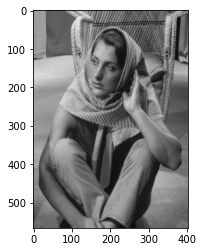

[[151 153 155 ...  70  79  85]
 [153 151 153 ...  80  92 107]
 [153 151 151 ... 109 118 125]
 ...
 [ 79  85  90 ... 111 111 107]
 [ 84  82  93 ... 107 109 110]
 [ 85  90  90 ... 103 105 106]]


In [2]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os
import seaborn as sns

image = Image.open("../Image-Process/image_data/DIP3E_Original_Images_CH04/Fig0417(a)(barbara).tif")

plt.imshow(image, cmap='gray')
plt.show()

image_array = np.array(image)
print(image_array)

## 图像数字化的精度

* 图像空间分辨率：指图像数字化的空间精细程度。  
* 灰度级分辨率：指数字图像中灰度级别的数量。更高的灰度级分辨率意味着可以表示更多不同亮度水平，这通常会带来更丰富的图像细节。

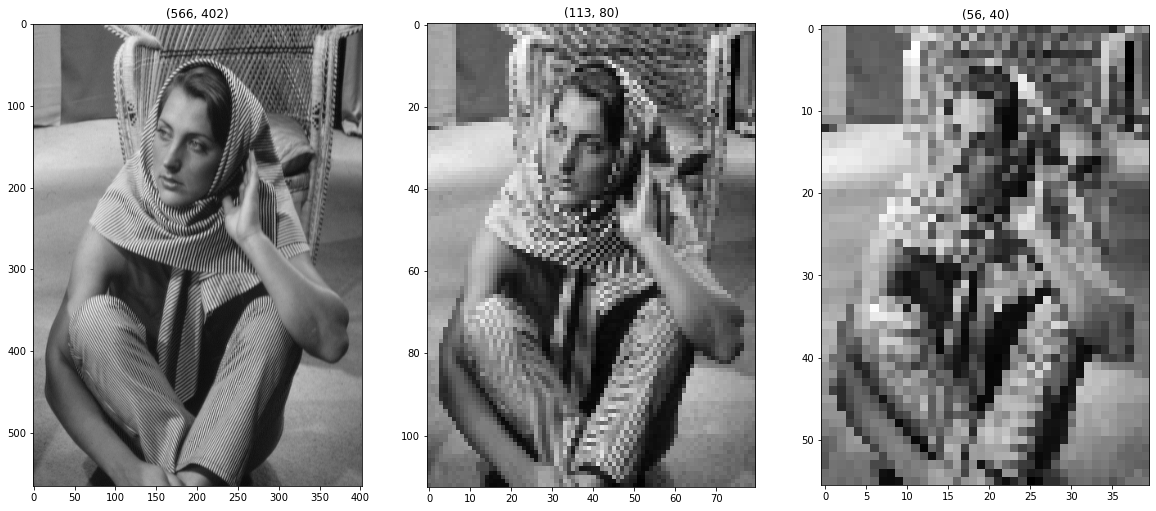

In [2]:
#图像空间分辨率变化的典型效果#
height, width = image_array.shape
resized1_image = cv2.resize(image_array, (int(width/5), int(height/5)))
resized2_image = cv2.resize(image_array, (int(width/10), int(height/10)))

_,(ax1,ax2,ax3) = plt.subplots(1,3,figsize = (20,10))
ax1.imshow(image,cmap = "gray")
ax1.set_title(image_array.shape)
ax2.imshow(resized1_image,cmap = "gray")
ax2.set_title(resized1_image.shape)
ax3.imshow(resized2_image,cmap = "gray")
ax3.set_title(resized2_image.shape)
plt.show()

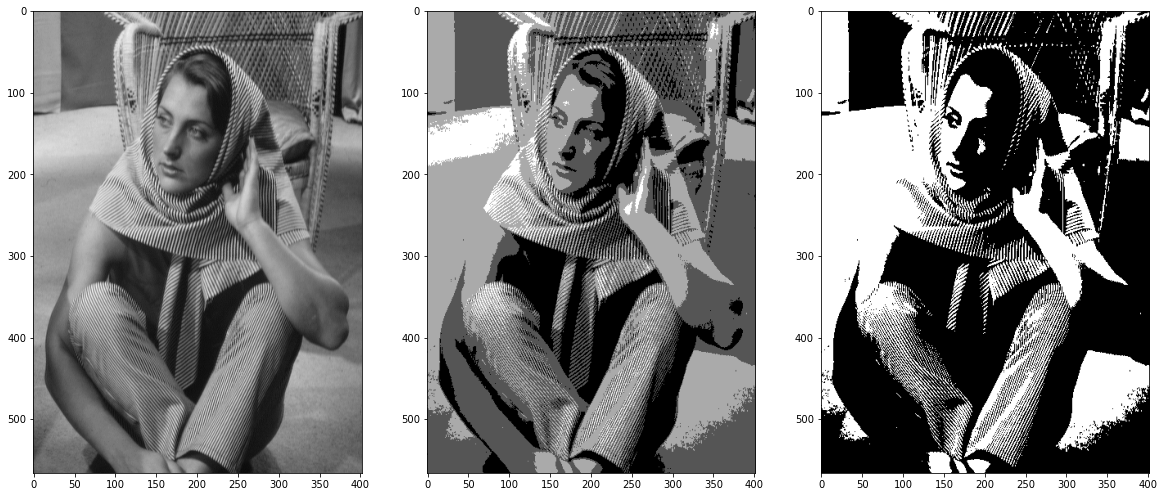

In [3]:
#图像灰度分辨率变化的典型效果#
image_new1 = np.floor(image_array / (2**6))
image_new1 = np.uint8(255 * image_new1 / np.max(image_new1))
image_new2 = np.floor(image_array / (2**7))
image_new2 = np.uint8(255 * image_new2 / np.max(image_new2))
_,(ax1,ax2,ax3) = plt.subplots(1,3,figsize = (20,10))
ax1.imshow(image,cmap = "gray")
ax2.imshow(image_new1,cmap = "gray")
ax3.imshow(image_new2,cmap = "gray")
plt.show()

## 数字图像处理的目的

**1）提高图像的视感质量，达到赏心悦目的目的。**
图像去除噪声，改变图像的亮度、颜色，增强图像中的某些成份、抑制某些成份，对图像进行几何变换等，从而改善图像的质量。

**2）提取图像中某些特征，以便于分析。**
常用作模式识别、计算机视觉的预处理等。这些特征包括很多方面，如频域特性、灰度／颜色特性、边界／区域特性、纹理特性、形状特性等。

## 将图像转为excel表

**1）灰度图**

Text(0.5, 1.0, '(200, 200)')

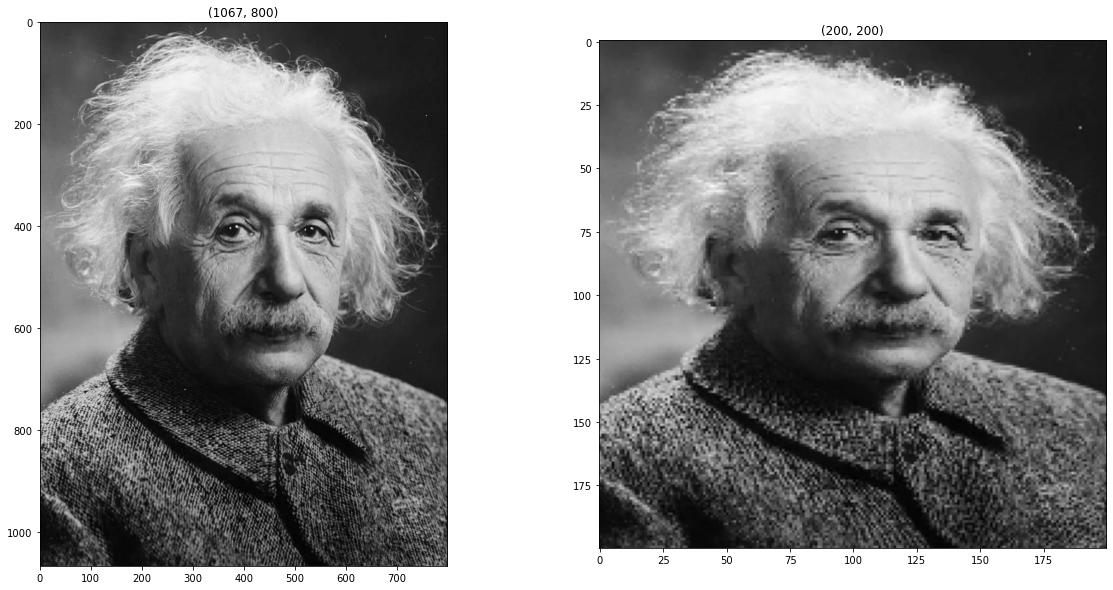

In [3]:
image = Image.open("../Image-Process/image_data/DIP3E_Original_Images_CH04/einstein.jpg")
image_array = np.array(image)

height, width = image_array.shape
resized1_image = cv2.resize(image_array, (int(200), int(200)))    #调整图像尺寸

_,(ax1,ax2) = plt.subplots(1,2,figsize = (20,10))
ax1.imshow(image,cmap = "gray")
ax1.set_title(image_array.shape)
ax2.imshow(resized1_image,cmap = "gray")
ax2.set_title(resized1_image.shape)

In [5]:
import os
import numpy as np
from openpyxl import Workbook
from PIL import Image

# 获取当前工作目录
current_directory = os.getcwd()

# 创建一个新的工作簿
workbook = Workbook()
sheet = workbook.active

# 将像素值写入 Excel 表格
for y, row in enumerate(resized1_image):
    for x, pixel_value in enumerate(row):
        sheet.cell(row=y + 1, column=x + 1, value=pixel_value)

# 保存工作簿
output_path = os.path.join(current_directory, "output.xlsx")
workbook.save(output_path)

**2）彩色图**

Text(0.5, 1.0, '(200, 200, 3)')

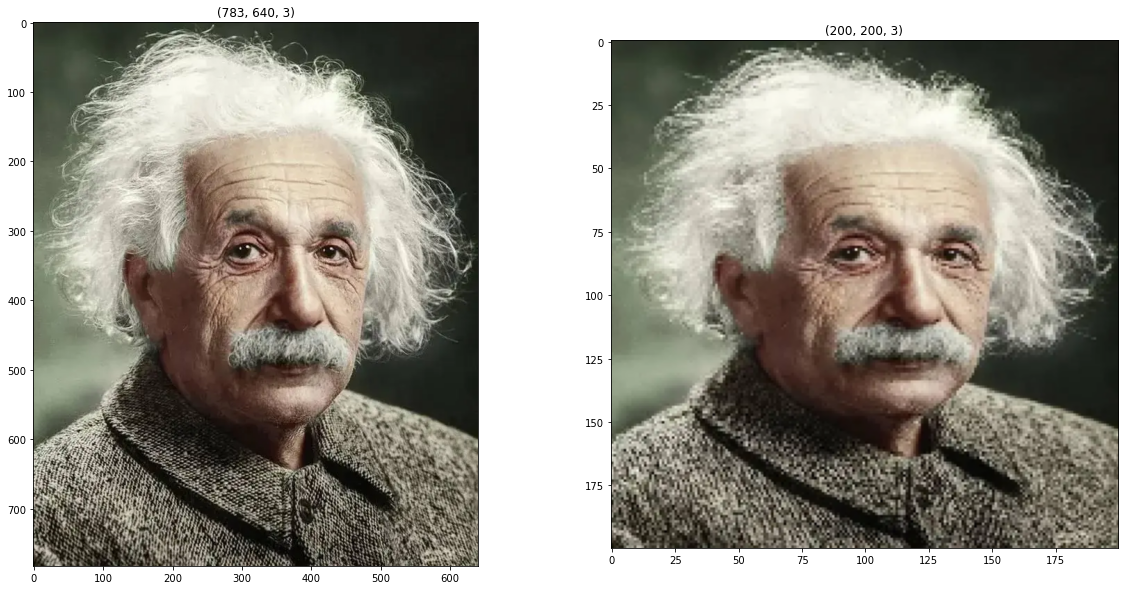

In [5]:
image = Image.open("../Image-Process/image_data/DIP3E_Original_Images_CH04/einstein-color.jpg")
image_array = np.array(image)

height, width, channels = image_array.shape
resized1_image = cv2.resize(image_array, (int(200), int(200)))    #调整图像尺寸

_,(ax1,ax2) = plt.subplots(1,2,figsize = (20,10))
ax1.imshow(image,cmap = "gray")
ax1.set_title(image_array.shape)
ax2.imshow(resized1_image,cmap = "gray")
ax2.set_title(resized1_image.shape)

In [14]:
import os
import numpy as np
from openpyxl import Workbook
from PIL import Image

# 获取当前工作目录
current_directory = os.getcwd()

# 创建一个新的工作簿
workbook = Workbook()
sheet = workbook.active

image_array_color = np.array(resized1_image)
height, width, channels = image_array_color.shape

# 将像素值写入 Excel 表格
for y in range(height):
    for x in range(width):
        
        red, green, blue = image_array_color[y,x]
        
        sheet.cell(row=y * 3 + 1, column=x + 1, value=red)
        sheet.cell(row=y * 3 + 2, column=x + 1, value=green)
        sheet.cell(row=y * 3 + 3, column=x + 1, value=blue)

# 保存工作簿
output_path = os.path.join(current_directory, "output-color.xlsx")
workbook.save(output_path)